In [13]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\programdata\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [14]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
X = df.drop(columns = ['koi_disposition'])


In [4]:
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
y = df['koi_disposition']

In [6]:
print(X.shape, y.shape)

(6991, 40) (6991,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


k: 1, Train/Test Score: 1.000/0.591
k: 3, Train/Test Score: 0.793/0.620
k: 5, Train/Test Score: 0.747/0.637
k: 7, Train/Test Score: 0.729/0.635
k: 9, Train/Test Score: 0.721/0.644
k: 11, Train/Test Score: 0.713/0.645
k: 13, Train/Test Score: 0.704/0.645
k: 15, Train/Test Score: 0.700/0.644
k: 17, Train/Test Score: 0.688/0.646
k: 19, Train/Test Score: 0.688/0.647
k: 21, Train/Test Score: 0.686/0.642
k: 23, Train/Test Score: 0.686/0.642
k: 25, Train/Test Score: 0.681/0.638
k: 27, Train/Test Score: 0.678/0.636
k: 29, Train/Test Score: 0.671/0.637
k: 31, Train/Test Score: 0.670/0.644
k: 33, Train/Test Score: 0.672/0.644
k: 35, Train/Test Score: 0.670/0.641
k: 37, Train/Test Score: 0.670/0.638
k: 39, Train/Test Score: 0.670/0.641


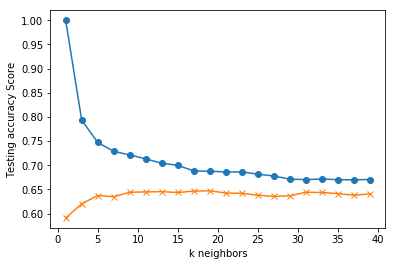

In [14]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
print('k=31 Test Acc: %.3f' % knn.score(X_test, y_test))

k=31 Test Acc: 0.644


In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.677283997711234
Testing Data Score: 0.6653318077803204


In [17]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED' 'CONFIRMED'
 'FALSE POSITIVE' 'FALSE POSITIVE' 'CANDIDATE' 'FALSE POSITIVE'
 'FALSE POSITIVE' 'FALSE POSITIVE']
First 10 Actual labels: ['CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE']


In [18]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True).head()

,Prediction,Actual
0,FALSE POSITIVE,CANDIDATE
1,FALSE POSITIVE,FALSE POSITIVE
2,CONFIRMED,FALSE POSITIVE
3,CONFIRMED,FALSE POSITIVE
4,FALSE POSITIVE,CANDIDATE


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [19]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2 = scaler.fit_transform(df)

df2 = pd.DataFrame(df2, columns=df2.columns)

ValueError: could not convert string to float: 'CONFIRMED'

# Train the Model



In [ ]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)